In [2]:
import os
HOME = os.getcwd()
print(HOME)



/media/marcin/Dysk lokalny/Programowanie/Python/Magisterka/Projekt Badawczy/Github/Ticket-to-ride


In [3]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2060, 5924MiB)
Setup complete ✅ (12 CPUs, 15.5 GB RAM, 46.2/77.4 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

In [7]:
%cd {HOME}
!yolo task=detect mode=predict model=Roboflow_model/best_grid.pt conf=0.25 source=dataset/age_of_steam/board save=True save_txt=True save_conf=True 


/media/marcin/Dysk lokalny/Programowanie/Python/Magisterka/Projekt Badawczy/Github/Ticket-to-ride
2023-12-04 22:26:25.732342: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-04 22:26:25.734006: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 22:26:25.760574: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-04 22:26:26.233540: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLO

(34, 8)


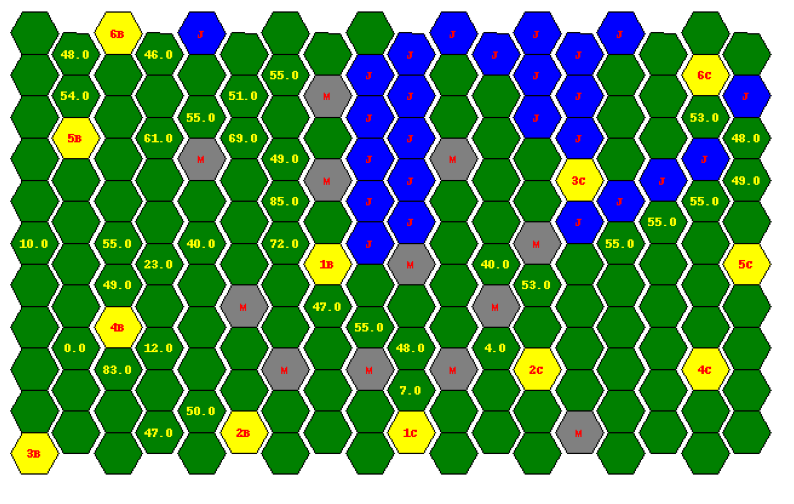

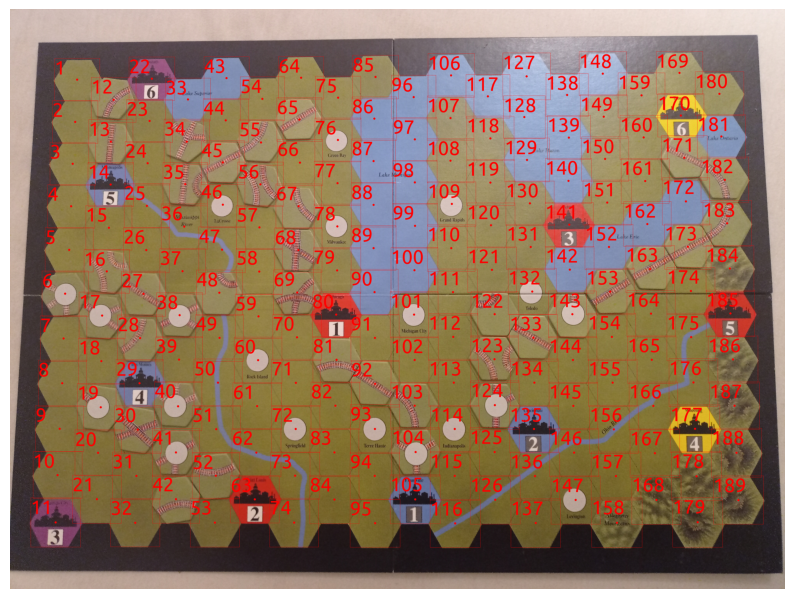

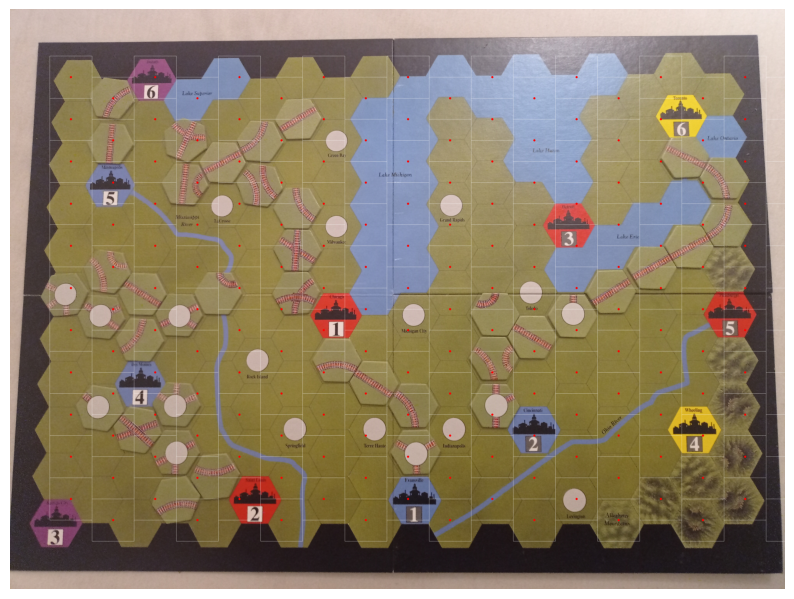

In [69]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import math
import numpy as np


# Liczba kolumn i wierszy w planszy
columns = 18
rows_in_columns = [11, 10, 11, 10, 11, 10, 11, 10, 11, 10, 11,10,11,10,11,10,11,10]
rows = 11

# Tworzenie obrazu planszy
image_path = 'dataset/age_of_steam/board/original.jpg'
data = np.loadtxt('runs/detect/predict2/labels/original.txt')
data_detect = np.loadtxt('/media/marcin/Dysk lokalny/Programowanie/Python/Magisterka/Projekt Badawczy/Github/Ticket-to-ride/runs/detect/predict/labels/original.txt')
row_numbers1 = np.arange(1, data_detect.shape[0] + 1)
row_numbers2 = np.arange(1, data_detect.shape[0] + 1)
data_detect = np.column_stack((data_detect, row_numbers1))
data_detect = np.column_stack((data_detect, row_numbers2))


tab = [[None for _ in range(columns)] for _ in range(rows)]

tab[5][7]  = "1B"
tab[9][5]  = "2B"
tab[10][0] = "3B"
tab[7][2]  = "4B"
tab[2][1]  = "5B"
tab[0][2]  = "6B"
tab[9][9]  = "1C"
tab[8][12] = "2C"
tab[3][13] = "3C"
tab[8][16] = "4C"
tab[5][17] = "5C"
tab[1][16] = "6C"
tab[9][13] = "M"
tab[2][17] = "M"
tab[4][15]  = "M"
tab[5][12]  = "M"
tab[6][11]  = "M"
tab[8][10]  = "M"
tab[3][10]  = "M"
tab[5][9]  = "M"
tab[8][8]  = "M"
tab[1][7]  = "M"
tab[3][7]  = "M"
tab[8][6]  = "M"
tab[6][5]  = "M"
tab[3][4] = "M"
tab[0][3] = "J"
tab[0][4] = "J"
tab[5][8] = "J"
tab[4][8] = "J"
tab[3][8] = "J"
tab[2][8] = "J"
tab[1][8] = "J"
tab[4][9] = "J"
tab[3][9] = "J"
tab[2][9] = "J"
tab[1][9] = "J"
tab[0][9] = "J"
tab[0][10] = "J"
tab[0][11] = "J"
tab[0][12] = "J"
tab[1][12] = "J"
tab[2][12] = "J"
tab[0][13] = "J"
tab[1][13] = "J"
tab[2][13] = "J"
tab[4][13] = "J"
tab[0][14] = "J"
tab[4][14] = "J"
tab[3][15] = "J"
tab[3][16] = "J"
tab[1][17] = "J"


def delete_duplicates(data_):
    # sortujemy dane po wierszach
    data_ = data_[data_[:, 1].argsort()]
    # iterujemy po wierszach
    in_len = len(data_)
    for i in range(in_len):
        # iterujemy po pozostałych wierszach
        for j in range(i + 1, in_len):
            # jeśli rows są podobne
            if abs(data_[i][1] - data_[j][1]) < 0.0015 and abs(data_[i][2] - data_[j][2]) < 0.0015:
                # usuwamy wiersz o mniejszym confidence
                if data_[i][5] > data_[j][5]:
                    data_ = np.delete(data_, j, axis=0)
                    in_len -= 1
                    break
                else:
                    data_ = np.delete(data_, i, axis=0)
                    in_len -= 1
                    break
        
    return data_

def draw_hex(x_, y_, board_,size_, angle_, text_=None,):

   
    draw = ImageDraw.Draw(board_)

    x0, y0 = x_ + size_ * math.cos(angle_), y_ - size_ * math.sin(angle_)
    x1, y1 = x_ + size_ * math.cos(angle_ + math.radians(60)), y_ - size_ * math.sin(angle_ + math.radians(60))
    x2, y2 = x_ + size_ * math.cos(angle_ + math.radians(120)), y_ - size_ * math.sin(angle_ + math.radians(120))
    x3, y3 = x_ + size_ * math.cos(angle_ + math.radians(180)), y_ - size_ * math.sin(angle_ + math.radians(180))
    x4, y4 = x_ + size_ * math.cos(angle_ + math.radians(240)), y_ - size_ * math.sin(angle_+ math.radians(240))
    x5, y5 = x_ + size_ * math.cos(angle_ + math.radians(300)), y_ - size_* math.sin(angle_ + math.radians(300))

    points = [x0, y0, x1, y1, x2, y2, x3, y3, x4, y4, x5, y5]
    draw.polygon(points, outline=(0, 0, 0),fill='green')

    if text_:
        color = "yellow"
        if text_ == "J":
            draw.polygon(points, outline=(0, 0, 0),fill='blue')
            color = "red"
        if text_ == "M":
            draw.polygon(points, outline=(0, 0, 0),fill='gray')
            color = "red"
        if text_ == "1B" or text_ == "2B" or text_ == "3B" or text_ == "4B" or text_ == "5B" or text_ == "6B" or text_ == "1C" or text_ == "2C" or text_ == "3C" or text_== "4C" or text_ == "5C" or text_ == "6C":
            draw.polygon(points, outline=(0, 0, 0),fill='yellow')
            color = "red"
        center_x = x_
        center_y = y_
        # Ustaw czcionkę i size textu
        font = ImageFont.load_default()
        # Calculate text length
        text_length = draw.textlength(text_, font=font)
        text_x = center_x - text_length/2
        text_y = center_y-5  # Adjust the Y position as needed

        draw.text((text_x, text_y), text_, fill=color, font=font)

def draw_board(columns_, rows_in_columns_, tab_):

    # size heksów
    hex_size = 20
    
    # size planszy
    weight = 640
    height = 400

    board = Image.new('RGB', (weight, height), (255, 255, 255))
    x = hex_size
    y = hex_size
    space = hex_size * 3**0.5 / 2  # Odległość między środkami heksów

    for i, column in enumerate(range(columns_)):
        if i % 2 == 0:
            y = hex_size
        else:
            y = hex_size + hex_size * 3**0.5/2
        for j, rows in enumerate(rows_in_columns_):
            if i < columns_ and j < rows:
                if tab[j][i] is not None:
                    if i % 2 != 1 or j!=10:
                      draw_hex(x, y,board, hex_size, 0, text_=tab_[j][i])
                else:
                    if i % 2 != 1 or j!=10:
                      draw_hex(x, y,board, hex_size, 0, text_="")
            y += space * 2
        x += space * 2
    board.save('board_hex.png')
    return board

def draw_rectangles(data_,path_):
    image = Image.open(path_)
    draw = ImageDraw.Draw(image)
    image_width, image_height = image.size
    i = 0
    data_ = data_[data_[:, 1].argsort()]
    m = 0
    l = 11


    for i in range(18): 

        if (i+1)%2 == 1:
            first_11_elements = data_[m:l]
            sorted_first_11_elements = first_11_elements[first_11_elements[:, 2].argsort()]
            data_[m:l] = sorted_first_11_elements
            m = l
            l = l + 10

        if (i+1)%2 == 0:
            first_10_elements = data_[m:l]
            sorted_first_10_elements = first_10_elements[first_10_elements[:, 2].argsort()]
            data_[m:l] = sorted_first_10_elements
            m = l
            l = l + 11

    row_numbers1 = np.arange(1, data_.shape[0] + 1)
    row_numbers2 = np.arange(1, data_.shape[0] + 1)
    row_numbers3 = np.arange(1, data_.shape[0] + 1)

    # Dodawanie nowych kolumn do tablicy data
    data_ = np.column_stack((data_, row_numbers1))
    data_ = np.column_stack((data_, row_numbers2))
    data_ = np.column_stack((data_, row_numbers3))
    

    k = 0
    j = 0

    for ix,row in enumerate(data_):
        data_[ix][8] = k
        data_[ix][7] = j
        j = j + 1
        if k%2 == 0:
            if j == 11:
                k = k + 1
                j = 0
        if k%2 == 1:
            if j == 10:
                k = k + 1
                j = 0



    i = 1

    for row in data_:
        # Get the class and dimensions
        class_, x_prop, y_prop, width_prop, height_prop, conf,index,o,p = row

        x = x_prop * image_width
        y = y_prop * image_height
        width = width_prop * image_width
        height = height_prop * image_height
        x1 = x + width/2
        x2 = x - width/2
        y1 = y + height/2
        y2 = y - height/2

        # Draw a circle at the center
        draw.ellipse((x - 5, y - 5, x + 5, y + 5), fill='red')
        draw.rectangle([(x2,y2), (x1,y1)], outline="red")

        # Draw the class label
        text = f'{index:.0f}'
        font = ImageFont.truetype("fonts/Ubuntu-Regular.ttf", size=100)
        draw.text((x2, y2 - 10), text, fill="red",font= font)
        i += 1
    image.save('output.jpg')
    return image, data_ 


data = delete_duplicates(data)
data_detect = delete_duplicates(data_detect)
image2 = Image.open('/media/marcin/Dysk lokalny/Programowanie/Python/Magisterka/Projekt Badawczy/Github/Ticket-to-ride/runs/detect/predict/original.jpg')
image3,grid =draw_rectangles(data,image_path)


print(data_detect.shape)

for i in range(data_detect.shape[0]):
    distances = np.sqrt(np.sum((grid[:, [1, 2]] - data_detect[i, [1, 2]])**2, axis=1))
    closest_index = np.argmin(distances)
    data_detect[i, [6, 7]] = grid[closest_index, [7, 8]]


for row in data_detect:
    class_, x_prop, y_prop, width_prop, height_prop, conf,o,p = row
    o = int(o)
    p = int(p)
    tab[o][p] = str(class_)
    
    

image = draw_board(columns, rows_in_columns, tab)


#Wyświetlanie
fig = plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
plt.show()
fig1 = plt.figure(figsize=(10, 8))
plt.imshow(image2)
plt.axis('off')
plt.show()
fig12 = plt.figure(figsize=(10, 8))
plt.imshow(image3)
plt.axis('off')
plt.show()

In [59]:
data_detect[0,[0,6,7]]

array([83.,  2.,  8.])